In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [39]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [40]:
x = df.drop(['Survived'],axis=1)
y = df[['Survived']]

### without Binning

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_train.shape,x_test.shape

((499, 2), (215, 2))

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred = clf.predict(x_test)


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

print("Accuracy score without binning : ",accuracy_score(y_test,y_pred))
print("cross val score without binning : ",cross_val_score(clf,x,y,scoring='accuracy').mean())

Accuracy score without binning :  0.6093023255813953
cross val score without binning :  0.6246429626711317


### after binning

In [45]:
from sklearn.preprocessing import KBinsDiscretizer

kbin_age = KBinsDiscretizer(n_bins=10,strategy='uniform',encode='ordinal')
kbin_fare = KBinsDiscretizer(n_bins=10,strategy='uniform',encode='ordinal')

In [46]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer([
    ('trf1',kbin_age,['Age']),
    ('trf2',kbin_fare,['Fare'])
])

In [53]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

/home/janardhan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/janardhan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [69]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_transformed[:,0],
    'fare':x_train['Fare'],
    'fare_trf': x_train_transformed[:,1]
})
output

,age,age_trf,fare,fare_trf
678,43.0,5.0,46.9000,0.0
800,34.0,4.0,13.0000,0.0
645,48.0,5.0,76.7292,1.0
626,57.0,7.0,12.3500,0.0
566,19.0,2.0,7.8958,0.0
...,...,...,...,...
91,20.0,2.0,7.8542,0.0
609,40.0,4.0,153.4625,2.0
729,25.0,3.0,7.9250,0.0
870,26.0,3.0,7.8958,0.0


In [68]:
trf.named_transformers_['trf1'].bin_edges_

array([array([ 0.67 ,  8.603, 16.536, 24.469, 32.402, 40.335, 48.268, 56.201,
              64.134, 72.067, 80.   ])                                       ],
      dtype=object)

In [71]:
clf = DecisionTreeClassifier()
clf.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [72]:
y_pred = clf.predict(x_test_transformed)

In [74]:
print("Accuracy score of after binning : ",accuracy_score(y_pred,y_test))
print("cross val score of after binning : ",cross_val_score(clf,trf.transform(x),y,scoring='accuracy').mean())

Accuracy score of after binning :  0.6744186046511628
cross val score of after binning :  0.6765488033093667


In [80]:
def discreize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,strategy=strategy,encode='ordinal')
    kbin_fare = KBinsDiscretizer(n_bins=bins,strategy=strategy,encode='ordinal')
    trf = ColumnTransformer([
        ('trf1',kbin_age,['Age']),
        ('trf2',kbin_fare,['Fare'])
    ])
    x_train_transformed = trf.fit_transform(x_train)
    x_test_transformed = trf.transform(x_test)
    
    clf = DecisionTreeClassifier()
    clf.fit(x_train_transformed,y_train)
    y_pred = clf.predict(x_test_transformed)
    print("Accuracy score of after binning : ",accuracy_score(y_pred,y_test))
    print("cross val score of after binning : ",cross_val_score(clf,trf.transform(x),y,scoring='accuracy').mean())
    
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    plt.hist(x_train['Age'],color='blue')
    plt.title('Age')
    plt.subplot(122)
    plt.hist(x_train_transformed[:,0],color='red')
    plt.title('Age')
    
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    plt.hist(x_train['Fare'],color='blue')
    plt.title('Fare')
    plt.subplot(122)
    plt.hist(x_train_transformed[:,1],color='red')
    plt.title('Fare')
    
    
    

Accuracy score of after binning :  0.6186046511627907
cross val score of after binning :  0.6457007780951443


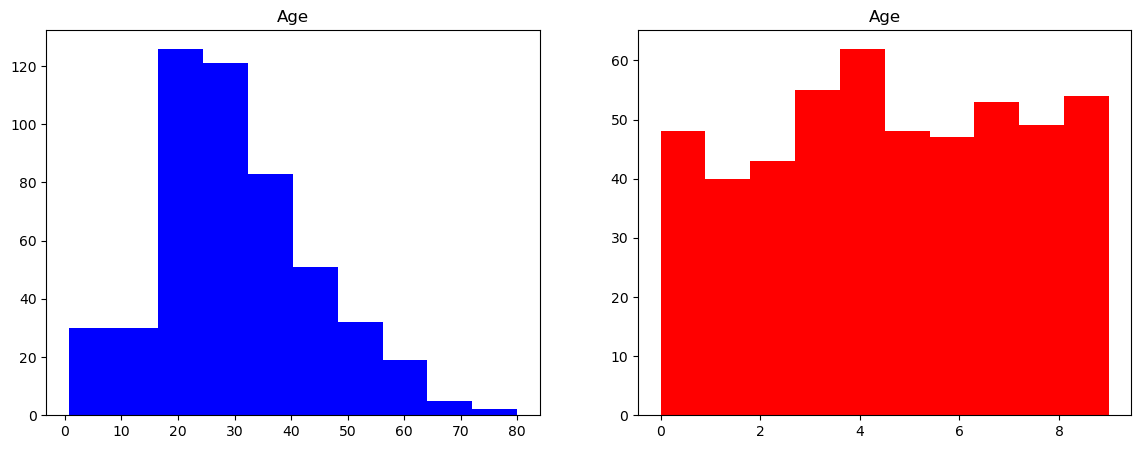

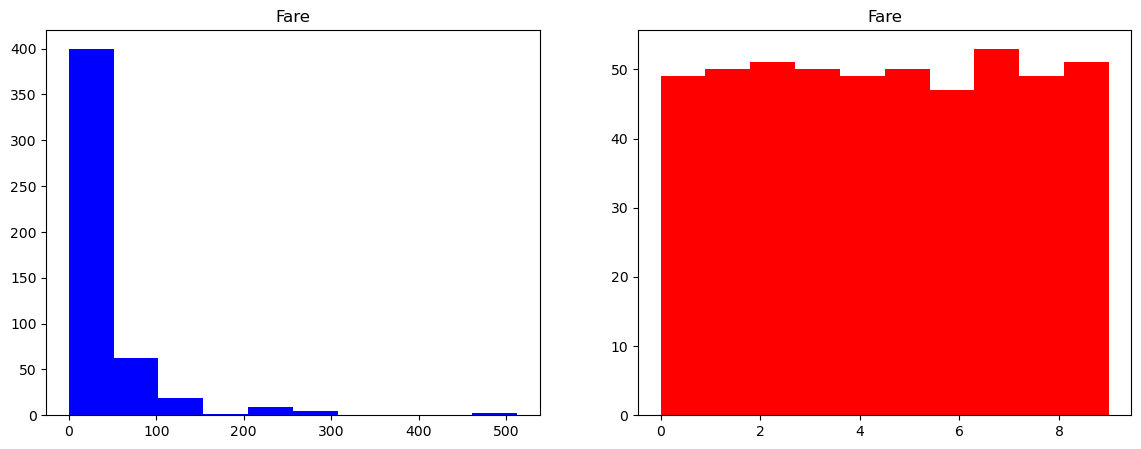

In [83]:
discreize(10,'quantile')